# Boiler

In [33]:
import pandas as pd 
import pandasql as ps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms

plt.style.use('seaborn-white')


from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)

import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [42]:
#read the dataset
#note that the csv file is space delimited
df = pd.read_csv('data/abalone_csv.csv',  delimiter=',') 
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## dataprep

In [43]:
df.columns = df.columns.str.lower()

In [44]:
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## split data

In [47]:
#CLASS needs to be dropped
X = df.drop(['sex'], axis=1) 
y = df['sex']

print(list(X.columns.values)) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'class_number_of_rings']
(3341, 8)
(836, 8)
(3341,)
(836,)


### Sklearn

In [61]:
ma = LogisticRegression(random_state=0, 
                            multi_class='multinomial', 
                            penalty='none', 
                            solver='newton-cg')
ma.fit(X_train, y_train)
probs1 = ma.predict_proba(X_test)

LogisticRegression(multi_class='multinomial', penalty='none', random_state=0,
                   solver='newton-cg')

In [62]:
ma.classes_

array(['F', 'I', 'M'], dtype=object)

In [65]:
pd.DataFrame(ma.coef_).T

,0,1,2
0,-6.145904,12.179397,-6.033493
1,6.607274,-6.830407,0.223133
2,3.929135,-5.450526,1.521391
3,1.872581,-4.222005,2.349425
4,-2.668916,2.797617,-0.128700
5,5.989396,-8.493247,2.503851
6,-1.506299,3.095346,-1.589047
7,0.061426,-0.122362,0.060936


#### acurária

In [72]:
ma.score(X_test, y_test)

0.5490430622009569

In [75]:
probsexp = np.exp(ma.predict_log_proba(X_test))
probsexp

array([[2.15764270e-01, 4.52622188e-01, 3.31613543e-01],
       [3.05785903e-01, 3.40526545e-01, 3.53687552e-01],
       [4.69308992e-01, 9.80572492e-03, 5.20885283e-01],
       ...,
       [5.58415028e-01, 6.11268243e-04, 4.40973704e-01],
       [9.03178424e-02, 7.14079028e-01, 1.95603130e-01],
       [4.56505065e-01, 6.00366203e-02, 4.83458315e-01]])

In [76]:
ma.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': 0,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [56]:
probs1df = pd.DataFrame(probs1, columns = ['M','I','F'])

In [58]:
probs1df

,M,I,F
0,0.215764,0.452622,0.331614
1,0.305786,0.340527,0.353688
2,0.469309,0.009806,0.520885
3,0.454394,0.091497,0.454108
4,0.543455,0.000973,0.455572
...,...,...,...
831,0.560852,0.001991,0.437157
832,0.090335,0.731598,0.178067
833,0.558415,0.000611,0.440974
834,0.090318,0.714079,0.195603


### statsmodels

In [78]:
logit_model=sm.MNLogit(endog = y_train,
                       exog = sm.add_constant(X_train))
logit_model
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.850662
         Iterations 8


#### Utilização de grupo de referência

In [80]:
stats1=result.summary()
print(stats1)

                          MNLogit Regression Results                          
Dep. Variable:                    sex   No. Observations:                 3341
Model:                        MNLogit   Df Residuals:                     3323
Method:                           MLE   Df Model:                           16
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                  0.2239
Time:                        12:50:54   Log-Likelihood:                -2842.1
converged:                       True   LL-Null:                       -3662.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                sex=I       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.8285      0.569      4.968      0.000       1.713       3.944
length                   18.3254      3.142      5.832      0.000      12.167      24.484
diameter

In [81]:
stats2=result.summary2()
print(stats2)

                           Results: MNLogit
Model:                 MNLogit            Pseudo R-squared:   0.224    
Dependent Variable:    sex                AIC:                5720.1255
Date:                  2021-12-18 12:52   BIC:                5830.1779
No. Observations:      3341               Log-Likelihood:     -2842.1  
Df Model:              16                 LL-Null:            -3662.2  
Df Residuals:          3323               LLR p-value:        0.0000   
Converged:             1.0000             Scale:              1.0000   
No. Iterations:        8.0000                                          
-----------------------------------------------------------------------
       sex = 0         Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
-----------------------------------------------------------------------
                const   2.8285   0.5693  4.9680 0.0000   1.7126  3.9444
               length  18.3254   3.1420  5.8323 0.0000  12.1671 24.4837
             diamete

In [107]:
params = result.params
params

,0,1
const,2.828472,2.533185
length,18.325373,0.112435
diameter,-13.437747,-6.384173
height,-9.379826,-2.407771
whole_weight,-6.094563,0.476838
shucked_weight,5.466499,2.540222
viscera_weight,-14.482651,-3.485534
shell_weight,4.601655,-0.082733
class_number_of_rings,-0.183787,-0.000490


In [110]:
X_train.shape
X_test.shape

(3341, 8)

(836, 8)

In [128]:
probs = logit_model.predict(params = params, exog = sm.add_constant(X_test))
probsdf = pd.DataFrame(probs, columns = ['F','I','M'])
probsdf

,F,I,M
0,0.215764,0.452623,0.331613
1,0.305786,0.340527,0.353688
2,0.469309,0.009806,0.520885
3,0.454394,0.091497,0.454109
4,0.543455,0.000973,0.455572
...,...,...,...
831,0.560852,0.001991,0.437157
832,0.090335,0.731598,0.178067
833,0.558415,0.000611,0.440973
834,0.090318,0.714079,0.195603


In [130]:
preds = probsdf.idxmax(axis=1)

In [132]:
#Create a confusion matrix
#y_test as first argument and the preds as second argument 
cm = confusion_matrix(y_test, preds)
cm

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(cm)
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column

pd.DataFrame(confmtrx, index=['Female','Infant', 'Male'],
columns=['predicted_Female', 'predicted_Infant', 'predicted_Male'])

array([[ 88,  44, 138],
       [ 15, 210,  35],
       [ 79,  66, 161]])

,predicted_Female,predicted_Infant,predicted_Male
Female,88,44,138
Infant,15,210,35
Male,79,66,161


In [135]:
#Accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

Accuracy Score: 0.5490430622009569


In [136]:
#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

              precision    recall  f1-score   support

           F       0.48      0.33      0.39       270
           I       0.66      0.81      0.72       260
           M       0.48      0.53      0.50       306

    accuracy                           0.55       836
   macro avg       0.54      0.55      0.54       836
weighted avg       0.54      0.55      0.54       836



# Metrics plot

In [182]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from scipy import interp

In [155]:
n_classes = y.nunique()

In [156]:
y_test_one = np.array(pd.get_dummies(y_test))

In [163]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thres = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thres[i] = roc_curve(y_test_one[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

### Calcular a curva roc_auc micro, ponderada então pela quantidade existente em cada classe

In [225]:
y_test_one

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

In [226]:
probs

array([[2.15763933e-01, 4.52622731e-01, 3.31613335e-01],
       [3.05785940e-01, 3.40526546e-01, 3.53687515e-01],
       [4.69308754e-01, 9.80576393e-03, 5.20885482e-01],
       ...,
       [5.58415422e-01, 6.11268305e-04, 4.40973309e-01],
       [9.03177912e-02, 7.14079112e-01, 1.95603097e-01],
       [4.56505275e-01, 6.00365154e-02, 4.83458209e-01]])

In [229]:
# Compute micro-average ROC curve and ROC area
# Perceba que o número de amostras existentes em cada classe fará diferença, afinal serão 
# diferentes matrizes de confusão produzidas
fpr_micro, tpr_micro, _ = roc_curve(y_test_one.ravel(), probs.ravel())
roc_auc_micro= auc(fpr_micro, tpr_micro)

### Calcular a curva roc_auc média 'macro'

#### Interpolação

In [218]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [219]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
# Obter TRP pela interpolação entre as curvas
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [223]:
fpr_macro = all_fpr
# Ponderar pelas 3 classes
# Desta forma é ponderação simples, e não considerando o quanto tem de cada classe
tpr_macro = mean_tpr/ n_classes

In [230]:
roc_auc_macro = auc(fpr_macro, tpr_macro)

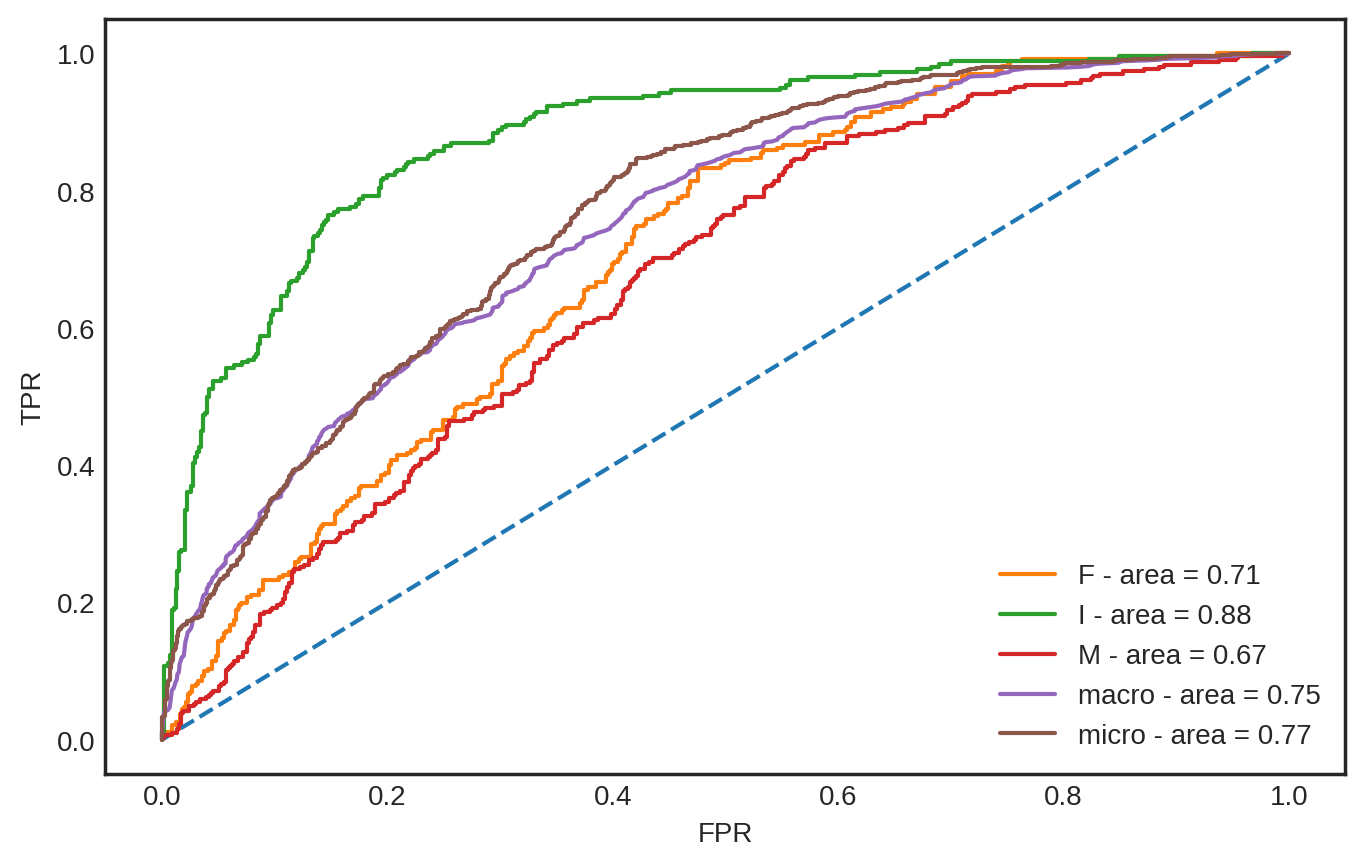

In [231]:
fg(w = 8, h = 5, dpi = 200)
plt.plot([0,1],[0,1], '--');
plt.plot(fpr[0], tpr[0], label = 'F - area = {0:0.2f}'.format(roc_auc[0]));
plt.plot(fpr[1], tpr[1], label = 'I - area = {0:0.2f}'.format(roc_auc[1]));
plt.plot(fpr[2], tpr[2], label = 'M - area = {0:0.2f}'.format(roc_auc[2]));
plt.plot(fpr_macro, tpr_macro, label = 'macro - area = {0:0.2f}'.format(roc_auc_macro))
plt.plot(fpr_micro, tpr_micro, label = 'micro - area = {0:0.2f}'.format(roc_auc_micro))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend();
plt.show();

In [ ]:
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [ ]:
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

### Brier score loss

In [232]:
from sklearn.metrics import brier_score_loss

In [278]:
predictions = probs[:,0]
testy = y_test_one[:,0]
losses = [
    brier_score_loss(
    testy,
    [y for x in range(len(testy))]) for y in predictions
]

In [279]:
brierdf = pd.DataFrame({'real':testy,'predictions':predictions,'brier':losses})

In [280]:
brierdf.sort_values(by = 'predictions')

,real,predictions,brier
160,0,0.017435,0.312008
592,0,0.023627,0.308264
527,0,0.026823,0.306360
404,0,0.027778,0.305796
348,0,0.028127,0.305589
...,...,...,...
321,1,0.651589,0.326652
501,0,0.661197,0.333059
87,1,0.669191,0.338531
322,0,0.681760,0.347392


In [281]:
brierdf['brier_new'] = (brierdf['real'] - brierdf['predictions'])**2

# PÁGINA MARAVILHOSA

https://hepex.inrae.fr/how-can-the-brier-score-know-my-inner-thoughts/

http://journal.sjdm.org/16/16218/jdm16218.html

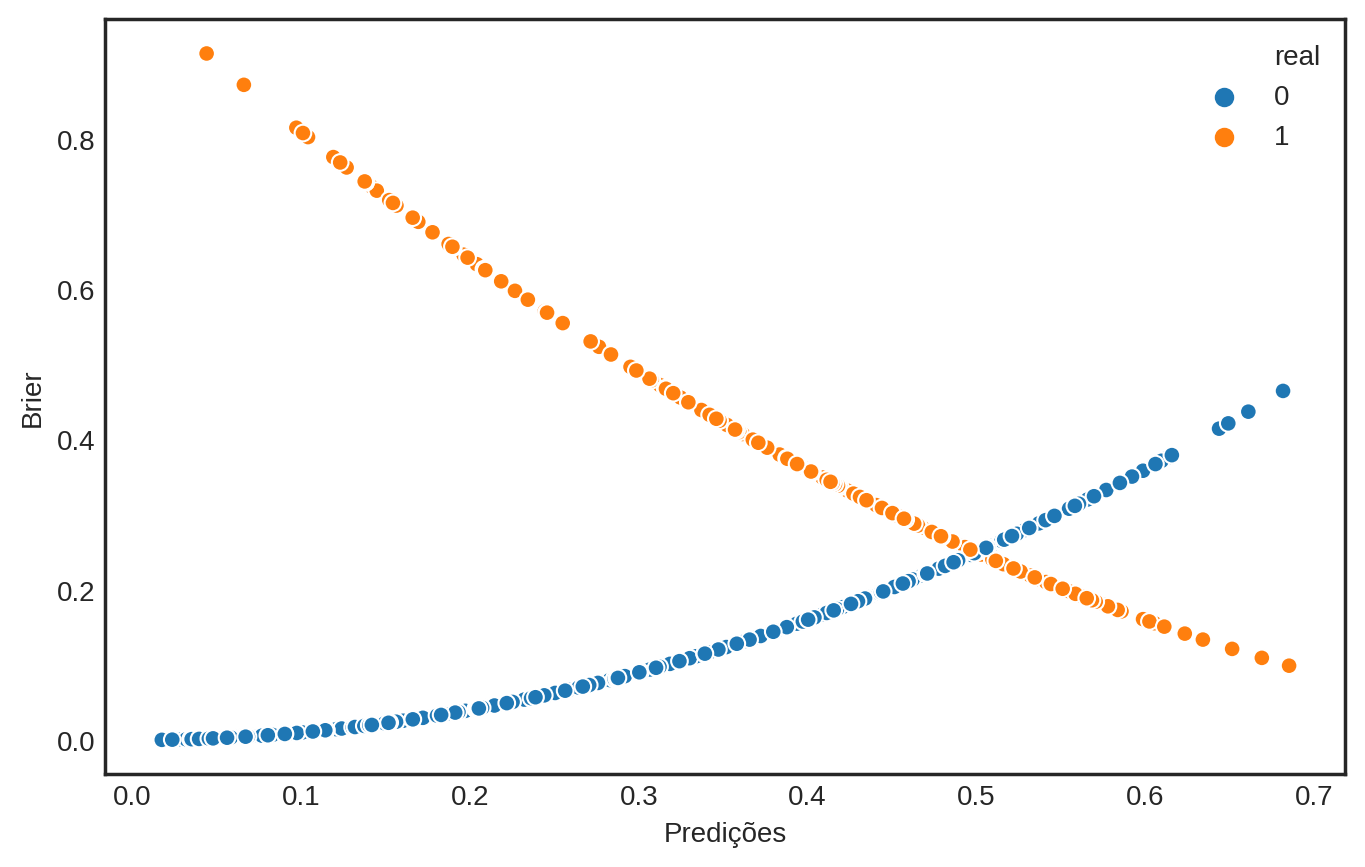

In [282]:
sns.scatterplot(data = brierdf, x = 'predictions', y = 'brier_new', hue = 'real');
plt.xlabel('Predições');
plt.ylabel('Brier');
plt.show();

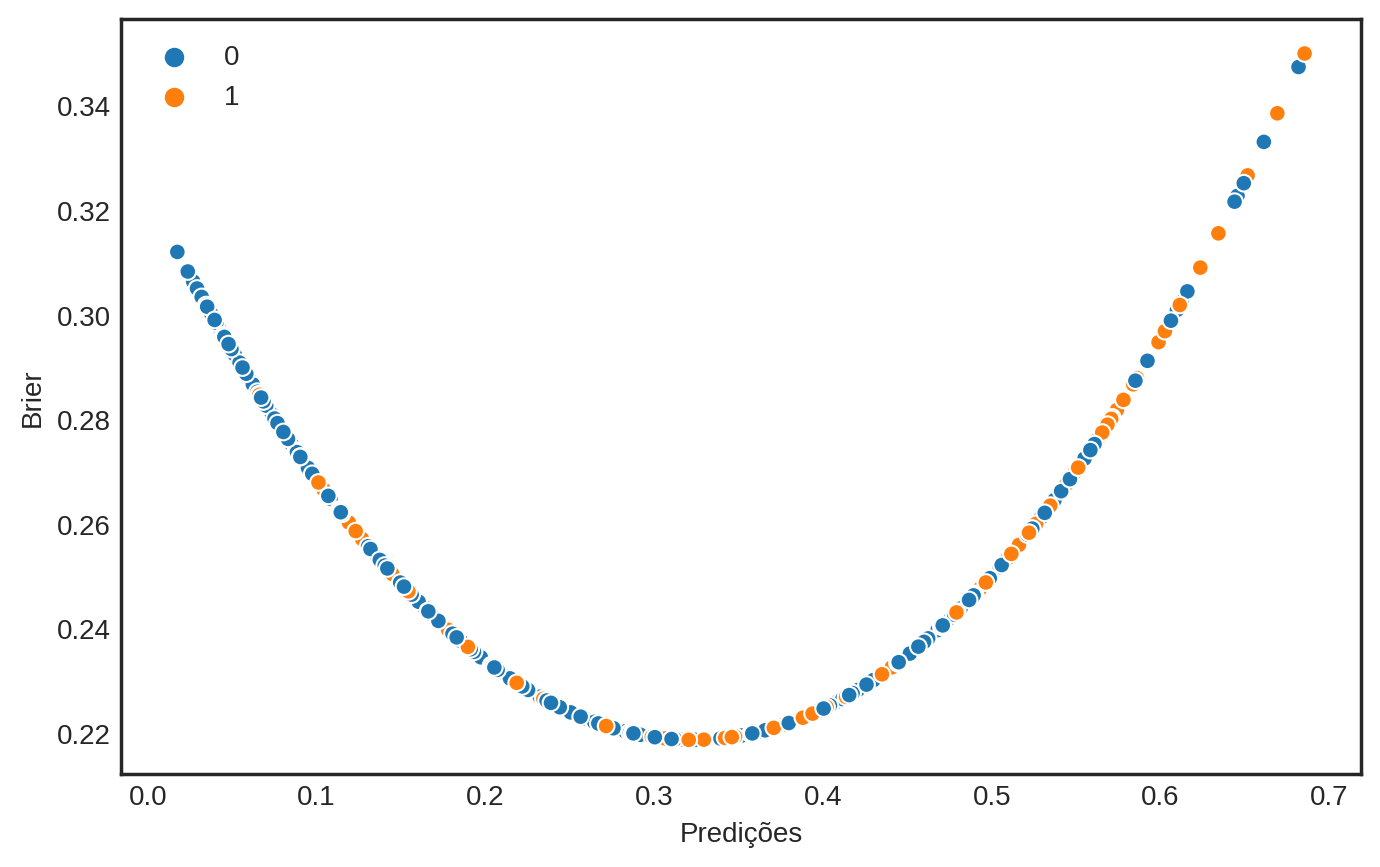

In [283]:
sns.scatterplot(x = predictions, y = losses, hue = testy);
plt.xlabel('Predições');
plt.ylabel('Brier');
plt.show();

<AxesSubplot:>

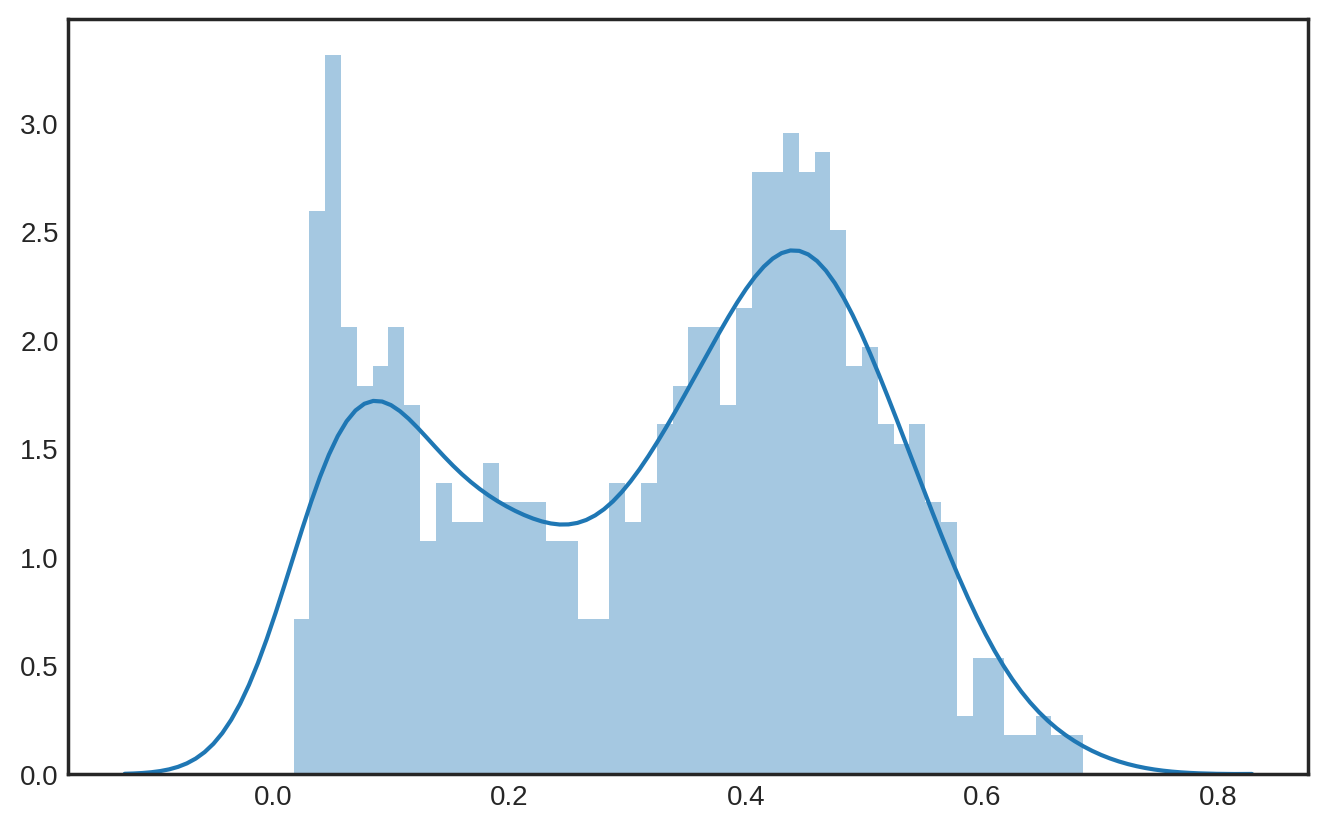

In [284]:
sns.distplot(predictions, bins = 50)